# Import Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [ ]:
#Removes the limit of columns that pandas can display
pd.set_option('display.max_columns', None)

# Entering train.csv data into python

In [5]:
train = pd.read_csv('train.csv')

#checking the value of first 5 rows
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#checking the value of last 5 rows
train.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
#checking data columns name
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [60]:
#check columns data type
print(train.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 76, dtype: object


In [6]:
#check if any data is missing  
for i in train.columns:
    n_miss = train[[i]].isnull().sum()
    perc = n_miss / train.shape[0] *100
    print('> %s, Missing: %d (%.1f%%)'%(i,n_miss,perc))

> Id, Missing: 0 (0.0%)
> MSSubClass, Missing: 0 (0.0%)
> MSZoning, Missing: 0 (0.0%)
> LotFrontage, Missing: 259 (17.7%)
> LotArea, Missing: 0 (0.0%)
> Street, Missing: 0 (0.0%)
> Alley, Missing: 1369 (93.8%)
> LotShape, Missing: 0 (0.0%)
> LandContour, Missing: 0 (0.0%)
> Utilities, Missing: 0 (0.0%)
> LotConfig, Missing: 0 (0.0%)
> LandSlope, Missing: 0 (0.0%)
> Neighborhood, Missing: 0 (0.0%)
> Condition1, Missing: 0 (0.0%)
> Condition2, Missing: 0 (0.0%)
> BldgType, Missing: 0 (0.0%)
> HouseStyle, Missing: 0 (0.0%)
> OverallQual, Missing: 0 (0.0%)
> OverallCond, Missing: 0 (0.0%)
> YearBuilt, Missing: 0 (0.0%)
> YearRemodAdd, Missing: 0 (0.0%)
> RoofStyle, Missing: 0 (0.0%)
> RoofMatl, Missing: 0 (0.0%)
> Exterior1st, Missing: 0 (0.0%)
> Exterior2nd, Missing: 0 (0.0%)
> MasVnrType, Missing: 8 (0.5%)
> MasVnrArea, Missing: 8 (0.5%)
> ExterQual, Missing: 0 (0.0%)
> ExterCond, Missing: 0 (0.0%)
> Foundation, Missing: 0 (0.0%)
> BsmtQual, Missing: 37 (2.5%)
> BsmtCond, Missing: 37 (2.

As we can see from above, data such as Alley, FireplaceQu, PoolQC, Fence and MiscFeature have a lot of Nan values. Therefore I will delete the data/drop it because if we do data imputation with a small sample, the results will be as expected. However, for other columns that have a missing value below 45%, data imputation will be carried out.


In [6]:
#drop column
train.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [7]:
#showing the data after dropping few columns 
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [8]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


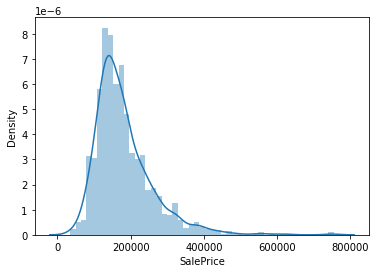

In [9]:
sns.distplot(train['SalePrice']);

The data processing below will only use data that contains numbers. I don't use categorical data because I have seen the contents and believe the data provided has an insignificant relationship to the selling price. Some things to pay attention to when buying and selling a house are the year of construction, the quality of the house, the size of the land, the number of bathrooms and bedrooms, and other things that tend to be numerical data, not categorical data.

# Correlation Matrix

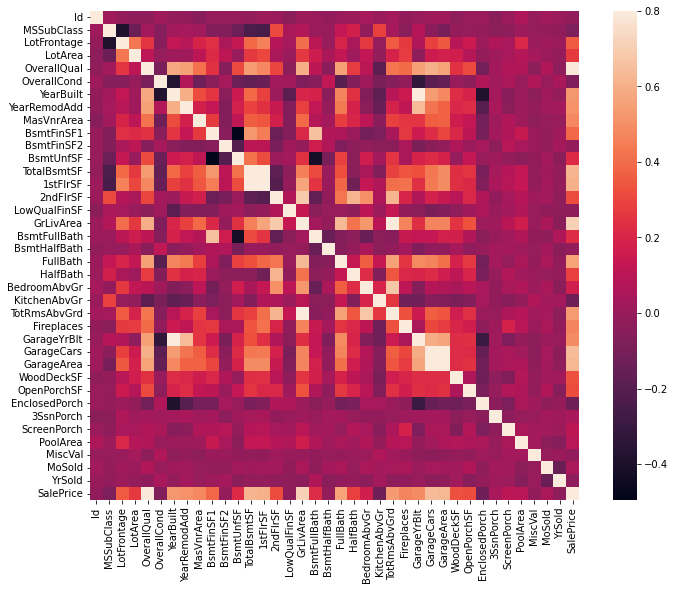

In [10]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# Feature selection using Confussion Matrix

After creating the correlation matrix above, I will only choose ten features that will be taken to be included in the machine-learning model

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


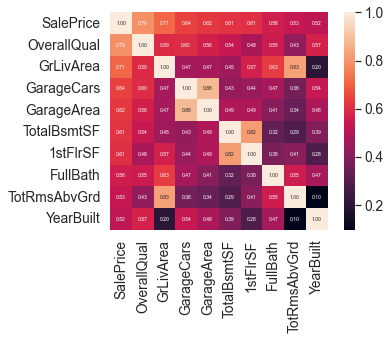

In [17]:
k = 10 #number of variables for heatmap
corrmat = train.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 5}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [30]:
corrmat = train.corr()
cols = corrmat.nsmallest(k, 'SalePrice')['SalePrice'].index
print(cols)

Index(['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold',
       'LowQualFinSF', 'Id', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2'],
      dtype='object')


<AxesSubplot:>

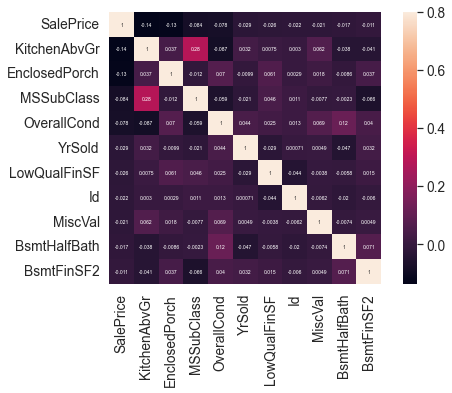

In [29]:
a = train[['SalePrice','KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold',
       'LowQualFinSF', 'Id', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2']]
corrmat = a.corr()
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, annot_kws={'size': 5})

The plot above shows the top 10 features closely related to the sale price value and the top 10 features that have a low correlation value with the sale price value. I'm looking for the top 10 features with a low correlation value to find out if there is a sizeable inverse correlation with the sale price value, but unfortunately, in this dataset, we don't have it. Therefore we will only focus on the top 10 features closely related to the sale price value.

Before we clean the data, we should see what features are displayed in the plot above and the meaning of these features.

1. SalePrice - the selling price of the property in dollars.
2. OverallQual: Overall material and finish quality
3. GrLivArea: Upscale living area (ground) in ft^2
4. GarageCars: The size of the garage in car capacity
5. GarageArea: Size of the garage in ft^2
6. TotalBsmtSF: Total ft^2 basement area
7. 1stFlrSF: Total ft^2 ground floor area
8. FullBath: complete bathroom above grade (I also don't understand what grade means above)
9. TotRmsAbvGrd: Number of rooms above grade
10. YearBuilt: The year the building was built

Several features are the same; the name is different, or the delivery method is different.
1. TotalBsmtSF and 1stFlrSF have the same content and convey the same thing; it's just that the feature names are different; therefore, we only need one of the features.
2. GarageCars and GarageArea are features that tell how much area there is for the garage, but they convey it in different ways, one in ft^2 and the other in-car units. Because these two are the same, I will only take the GarageCars feature because this feature has a higher correlation value than GarageArea

Therefore, after the data is cleaned of duplicates, we will create a new data frame containing 'SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', and 'YearBuilt'.


In [34]:
#to prove that TotalBsmtSF and 1stFlrSF have the same content and convey the same thing
train[['TotalBsmtSF','1stFlrSF']]

,TotalBsmtSF,1stFlrSF
0,856,856
1,1262,1262
2,920,920
3,756,961
4,1145,1145
...,...,...
1455,953,953
1456,1542,2073
1457,1152,1188
1458,1078,1078


In [36]:
#new data with selected features
feature_conf_data = train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']]
feature_conf_data

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt
0,208500,7,1710,2,856,2,8,2003
1,181500,6,1262,2,1262,2,6,1976
2,223500,7,1786,2,920,2,6,2001
3,140000,7,1717,3,756,1,7,1915
4,250000,8,2198,3,1145,2,9,2000
...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,953,2,7,1999
1456,210000,6,2073,2,1542,2,7,1978
1457,266500,7,2340,1,1152,2,9,1941
1458,142125,5,1078,1,1078,1,5,1950


Let's clean the data again by removing outliers using IQR and removing single values ​​and duplicated data.

In [43]:
dups = feature_conf_data.duplicated()
if dups.any()==True:
    print(feature_conf_data[dups])

In [45]:
counts = feature_conf_data.nunique()
to_del = [i for i,v in enumerate(counts) if v == 1]
if to_del != []:
    df.drop(to_del, axis=1, inplace=True)
    print(df.shape)

It can be seen that there is no single value and also duplicated data in this dataset.


In [37]:
import numpy as np
def outliers(s, replace=np.nan):
    for i in ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']:
        Q1, Q3 = np.nanquantile(s[i], [0.25 ,0.75])
        IQR = Q3-Q1
        s[i] = s[i].where((s[i] > (Q1 - 1.5 * IQR)) & (s[i] < (Q3 + 1.5 * IQR)), replace)
    return s

In [38]:
remove_outliers = outliers(feature_conf_data)

C:\Users\Steven\AppData\Local\Temp\ipykernel_8984\4028075114.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s[i] = s[i].where((s[i] > (Q1 - 1.5 * IQR)) & (s[i] < (Q3 + 1.5 * IQR)), replace)


In [41]:
for i in remove_outliers.columns:
    n_miss = remove_outliers[[i]].isnull().sum()
    perc = n_miss / train.shape[0] *100
    print('> %s, Missing: %d (%.1f%%)'%(i,n_miss,perc))

> SalePrice, Missing: 61 (4.2%)
> OverallQual, Missing: 23 (1.6%)
> GrLivArea, Missing: 31 (2.1%)
> GarageCars, Missing: 5 (0.3%)
> TotalBsmtSF, Missing: 61 (4.2%)
> FullBath, Missing: 0 (0.0%)
> TotRmsAbvGrd, Missing: 78 (5.3%)
> YearBuilt, Missing: 9 (0.6%)


Some data are outliers. Therefore we will delete the data and do data imputation using KNN imputation to fill in the missing data.

In [46]:
from numpy import isnan
from sklearn.impute import KNNImputer

new_data_knn = remove_outliers

imputer = KNNImputer()
imputer.fit(new_data_knn)
trans = imputer.transform(new_data_knn)
print('Missing: %d' % sum(isnan(trans).flatten()))

Missing: 0


In [50]:
after_knn1 = pd.DataFrame(trans)
after_knn1

,0,1,2,3,4,5,6,7
0,208500.0,7.0,1710.0,2.0,856.0,2.0,8.0,2003.0
1,181500.0,6.0,1262.0,2.0,1262.0,2.0,6.0,1976.0
2,223500.0,7.0,1786.0,2.0,920.0,2.0,6.0,2001.0
3,140000.0,7.0,1717.0,3.0,756.0,1.0,7.0,1915.0
4,250000.0,8.0,2198.0,3.0,1145.0,2.0,9.0,2000.0
...,...,...,...,...,...,...,...,...
1455,175000.0,6.0,1647.0,2.0,953.0,2.0,7.0,1999.0
1456,210000.0,6.0,2073.0,2.0,1542.0,2.0,7.0,1978.0
1457,266500.0,7.0,2340.0,1.0,1152.0,2.0,9.0,1941.0
1458,142125.0,5.0,1078.0,1.0,1078.0,1.0,5.0,1950.0


# Feature Selection using RFE

In [64]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

X = train.loc[:, train.columns != 'SalePrice']
X.drop('Id', axis=1, inplace=True)

y = train['SalePrice']

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
rfe.fit(X, y)

C:\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)

In [65]:
for i in range(X.shape[1]):
    if rfe.support_[i] == True:
        print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000
Column: 15, Selected True, Rank: 1.000
Column: 24, Selected True, Rank: 1.000
Column: 26, Selected True, Rank: 1.000
Column: 34, Selected True, Rank: 1.000


We can know that the following features are selected by RFE namely:
1. 'LotFrontage'
2. 'LotArea'
3.'BsmtFinSF1'
4. 'BsmtUnfSF'
5. 'TotalBsmtSF'
6. '1stFlrSF'
7. 'GrLivArea'
8. 'GarageYrBlt'
9. 'GarageArea'
10. 'MoSold'

Before we clean the data, it's a good idea to see what features are displayed in the plot above and the meaning of these features.

1. LotFrontage: linear feet of roads connected to the property
2. LotArea: Lot size in ft^2
3. BsmtFinSF1: Type 1 finished square feet
4. BsmtUnfS: FUnfinished square feet of the basement area
5. TotalBsmtSF: Total ft^2 basement area
6. 1stFlrSF: Total ft^2 ground floor area
7. GrLivArea: Upscale living area (ground) in ft^2
8. GarageYrBlt: The year the garage was built
9. GarageArea: Size of the garage in ft^2
10. MoSold: Month Sold

Several features have the same features as the feature selection that we do manually using a correlation matrix.

In [81]:
feature_selected_rfe = train[['SalePrice','LotFrontage','LotArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','GrLivArea','GarageYrBlt','GarageArea','MoSold']]

Let's clean the data again by removing outliers using IQR and removing single values ​​and duplicated data.

In [84]:
dups = feature_selected_rfe.duplicated()
if dups.any()==True:
    print(feature_selected_rfe[dups])

In [85]:
counts = feature_selected_rfe.nunique()
to_del = [i for i,v in enumerate(counts) if v == 1]
if to_del != []:
    df.drop(to_del, axis=1, inplace=True)
    print(df.shape)

It can be seen that there is no single value and also duplicated data in this dataset.


In [86]:
import numpy as np
def outliers(s, replace=np.nan):
    for i in ['SalePrice','LotFrontage','LotArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','GrLivArea','GarageYrBlt','GarageArea','MoSold']:
        Q1, Q3 = np.nanquantile(s[i], [0.25 ,0.75])
        IQR = Q3-Q1
        s[i] = s[i].where((s[i] > (Q1 - 1.5 * IQR)) & (s[i] < (Q3 + 1.5 * IQR)), replace)
    return s

In [87]:
remove_outliers = outliers(feature_selected_rfe)

C:\Users\Steven\AppData\Local\Temp\ipykernel_8984\3740725295.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s[i] = s[i].where((s[i] > (Q1 - 1.5 * IQR)) & (s[i] < (Q3 + 1.5 * IQR)), replace)


In [88]:
for i in remove_outliers.columns:
    n_miss = remove_outliers[[i]].isnull().sum()
    perc = n_miss / train.shape[0] *100
    print('> %s, Missing: %d (%.1f%%)'%(i,n_miss,perc))

> SalePrice, Missing: 61 (4.2%)
> LotFrontage, Missing: 347 (23.8%)
> LotArea, Missing: 69 (4.7%)
> BsmtFinSF1, Missing: 7 (0.5%)
> BsmtUnfSF, Missing: 29 (2.0%)
> TotalBsmtSF, Missing: 61 (4.2%)
> 1stFlrSF, Missing: 20 (1.4%)
> GrLivArea, Missing: 31 (2.1%)
> GarageYrBlt, Missing: 81 (5.5%)
> GarageArea, Missing: 21 (1.4%)
> MoSold, Missing: 0 (0.0%)


Some data are outliers. Therefore we will delete the data and do data imputation using KNN imputation to fill in the missing data.

In [89]:
from numpy import isnan
from sklearn.impute import KNNImputer

new_data_knn = remove_outliers

imputer = KNNImputer()
imputer.fit(new_data_knn)
trans = imputer.transform(new_data_knn)
print('Missing: %d' % sum(isnan(trans).flatten()))

Missing: 0


In [90]:
after_knn2 = pd.DataFrame(trans)
after_knn2

,0,1,2,3,4,5,6,7,8,9,10
0,208500.0,65.0,8450.0,706.0,150.0,856.0,856.0,1710.0,2003.0,548.0,2.0
1,181500.0,80.0,9600.0,978.0,284.0,1262.0,1262.0,1262.0,1976.0,460.0,5.0
2,223500.0,68.0,11250.0,486.0,434.0,920.0,920.0,1786.0,2001.0,608.0,9.0
3,140000.0,60.0,9550.0,216.0,540.0,756.0,961.0,1717.0,1998.0,642.0,2.0
4,250000.0,84.0,14260.0,655.0,490.0,1145.0,1145.0,2198.0,2000.0,836.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
1455,175000.0,62.0,7917.0,0.0,953.0,953.0,953.0,1647.0,1999.0,460.0,8.0
1456,210000.0,85.0,13175.0,790.0,589.0,1542.0,2073.0,2073.0,1978.0,500.0,2.0
1457,266500.0,66.0,9042.0,275.0,877.0,1152.0,1188.0,2340.0,1941.0,252.0,5.0
1458,142125.0,68.0,9717.0,49.0,0.0,1078.0,1078.0,1078.0,1950.0,240.0,4.0


# data combined from the results of Feature Selection 1 dan 2

I see several features picked up by feature selections 1 and 2 that are the same feature. Therefore I will create a dataset consisting only of those features. However, this will only leave three features besides the sale price. Therefore I will also create a dataset that contains features that were not selected before, and then the dataset will be entered again into the RFE, and only the top three selected ones will be taken. Of course, the dataset will not include 'garagecars' and '1stFlrSF'.

In [95]:
X = train[['LotFrontage','LotArea','BsmtFinSF1','BsmtUnfSF','GarageYrBlt','MoSold','OverallQual', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']]
y = train['SalePrice']

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)
rfe.fit(X, y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)

In [96]:
for i in range(X.shape[1]):
    if rfe.support_[i] == True:
        print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 1, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000


In [98]:
combine_feature_data = train[['SalePrice', 'GrLivArea', 'GarageArea', 'TotalBsmtSF','LotArea','BsmtUnfSF','GarageYrBlt']]

Let's clean the data again by removing outliers using IQR and removing single values ​​and duplicated data.

In [105]:
dups = combine_feature_data.duplicated()
if dups.any()==True:
    print(feature_selected_rfe[dups])
    combine_feature_data.drop_duplicates(inplace=True)

     SalePrice  LotFrontage  LotArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
193   130000.0          NaN   2522.0         0.0      970.0        970.0   

     1stFlrSF  GrLivArea  GarageYrBlt  GarageArea  MoSold  
193     970.0     1709.0       2004.0       380.0       5  


C:\Python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [106]:
counts = combine_feature_data.nunique()
to_del = [i for i,v in enumerate(counts) if v == 1]
if to_del != []:
    df.drop(to_del, axis=1, inplace=True)
    print(df.shape)

It can be seen that there is no single value and also duplicated data in this dataset.

In [107]:
import numpy as np
def outliers(s, replace=np.nan):
    for i in ['SalePrice', 'GrLivArea', 'GarageArea', 'TotalBsmtSF','LotArea','BsmtUnfSF','GarageYrBlt']:
        Q1, Q3 = np.nanquantile(s[i], [0.25 ,0.75])
        IQR = Q3-Q1
        s[i] = s[i].where((s[i] > (Q1 - 1.5 * IQR)) & (s[i] < (Q3 + 1.5 * IQR)), replace)
    return s

In [108]:
remove_outliers = outliers(combine_feature_data)

C:\Users\Steven\AppData\Local\Temp\ipykernel_8984\3472958300.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s[i] = s[i].where((s[i] > (Q1 - 1.5 * IQR)) & (s[i] < (Q3 + 1.5 * IQR)), replace)


In [109]:
for i in remove_outliers.columns:
    n_miss = remove_outliers[[i]].isnull().sum()
    perc = n_miss / train.shape[0] *100
    print('> %s, Missing: %d (%.1f%%)'%(i,n_miss,perc))

> SalePrice, Missing: 61 (4.2%)
> GrLivArea, Missing: 31 (2.1%)
> GarageArea, Missing: 21 (1.4%)
> TotalBsmtSF, Missing: 61 (4.2%)
> LotArea, Missing: 71 (4.9%)
> BsmtUnfSF, Missing: 29 (2.0%)
> GarageYrBlt, Missing: 81 (5.5%)


Some data are outliers. Therefore we will delete the data and do data imputation using KNN imputation to fill in the missing data.

In [110]:
from numpy import isnan
from sklearn.impute import KNNImputer

new_data_knn = remove_outliers

imputer = KNNImputer()
imputer.fit(new_data_knn)
trans = imputer.transform(new_data_knn)
print('Missing: %d' % sum(isnan(trans).flatten()))

Missing: 0


In [111]:
after_knn3 = pd.DataFrame(trans)
after_knn3

,0,1,2,3,4,5,6
0,208500.0,1710.0,548.0,856.0,8450.0,150.0,2003.0
1,181500.0,1262.0,460.0,1262.0,9600.0,284.0,1976.0
2,223500.0,1786.0,608.0,920.0,11250.0,434.0,2001.0
3,140000.0,1717.0,642.0,756.0,9550.0,540.0,1998.0
4,250000.0,2198.0,836.0,1145.0,14260.0,490.0,2000.0
...,...,...,...,...,...,...,...
1454,175000.0,1647.0,460.0,953.0,7917.0,953.0,1999.0
1455,210000.0,2073.0,500.0,1542.0,13175.0,589.0,1978.0
1456,266500.0,2340.0,252.0,1152.0,9042.0,877.0,1941.0
1457,142125.0,1078.0,240.0,1078.0,9717.0,0.0,1950.0


# Making Machine-Learning Model

Here, I will create a regression model using a random forest model to carry out the regression


In [150]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
rf1 = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18) #model for new data 01
rf2 = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18) #model for new data 02
rf3 = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18) #model for new data 03

In [151]:
#feature 1
x1 = after_knn1.loc[:, after_knn1.columns != 0]
y1 = after_knn1[0]

X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, train_size=0.7, random_state = 42)

#feature 2
x2 = after_knn2.loc[:, after_knn2.columns != 0]
y2 = after_knn2[0]
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, train_size=0.7, random_state = 42)

#feature 3
x3 = after_knn3.loc[:, after_knn3.columns != 0]
y3 = after_knn3[0]
X_train3, X_test3, y_train3, y_test3 = train_test_split(x3, y3, train_size=0.7, random_state = 42)

In [152]:
rf1 = rf1.fit(x1,y1)
rf2 = rf2.fit(x2,y2)
rf3 = rf3.fit(x3,y3)

In [153]:
prediction1 = rf1.predict(X_test1)
prediction2 = rf2.predict(X_test2)
prediction3 = rf3.predict(X_test3)

In [12]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mae = mean_absolute_error(y_test1, prediction1)
mse = mean_squared_error(y_test1, prediction1)
rmse = mse**.5
print("Model 1 predictions accuracy")
print("MAE :",mae)
print("MSE :",mse)
print("RMSE :",rmse,"\n\n")

mae = mean_absolute_error(y_test2, prediction2)
mse = mean_squared_error(y_test2, prediction2)
rmse = mse**.5
print("Model 2 predictions accuracy")
print("MAE :",mae)
print("MSE :",mse)
print("RMSE :",rmse,"\n\n")

mae = mean_absolute_error(y_test3, prediction3)
mse = mean_squared_error(y_test3, prediction3)
rmse = mse**.5
print("Model 3 predictions accuracy")
print("MAE :",mae)
print("MSE :",mse)
print("RMSE :",rmse)

 Model 1 predictions accuracy 
 MAE : 18233.393651274848
 MSE : 636363663.5036638
 RMSE : 25226.24949340793
 
 Model 2 predictions accuracy
 MAE : 17984.648959817117
 MSE : 651455915.871631
 RMSE : 25523.634456550873
 
 Model 3 predictions accuracy
 MAE : 19833.639606887573
 MSE : 724294127.007384
 RMSE : 26912.713111230238



# Create a model without data cleaning and feature selection

In [155]:
X = train.loc[:, train.columns != 'SalePrice']
X.drop('Id', axis=1, inplace=True)
X = X._get_numeric_data()

new_data_knn = X

imputer = KNNImputer()
imputer.fit(new_data_knn)
trans = imputer.transform(new_data_knn)
X = pd.DataFrame(trans)

y = train['SalePrice']

C:\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 42)

In [14]:
rf_no_clean_no_selection = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(X_train,y_train)

prediction = rf_no_clean_no_selection.predict(X_test)

mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5

print("Model's predictions accuracy without data cleaning and feature selection")
print("MAE :",mae)
print("MSE",mse)
print("RMSE :",rmse)

Model's predictions accuracy without data cleaning and feature selection 
MAE : 19898.66811404776
MSE 1030223407.7743828
RMSE : 32097.0934474507


As can be seen above that the three models above already have high accuracy. For the MAE and MSE values ​​of these three models, the best model is the first model, followed by the second model and the last model.

From the models above, we can also see the importance of performing feature selection and data cleaning on the dataset because even though they look similar at first glance, the errors resulting from these models have a higher value.